## 1. Loading Liabraries and Data

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [64]:
#loading data
df = pd.read_csv('../data/Churn_Modelling.csv')

In [65]:
pd.set_option('display.max_columns', None)

## 2. Understanding the data

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.shape

(10000, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [70]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 3. Visualize missing values

In [71]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [72]:
df.isnull().sum().sum()

np.int64(0)

In [73]:
missing = df.isnull().sum()

missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=missing.index, y=missing.values)

    for i, v in enumerate(missing.values):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.title("Number of missing values by columns")
    plt.ylabel("Missing values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values in the dataset.")

✅ No missing values in the dataset.


## 4. Data Manipulation

In [74]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5. Data Visualization

In [76]:
sns.set(style="whitegrid")

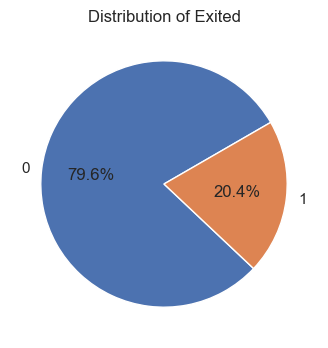

In [77]:
counts = df.Exited.value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts.values, labels=counts.index, startangle=30, autopct='%.1f%%')
plt.title('Distribution of Exited')
plt.show()

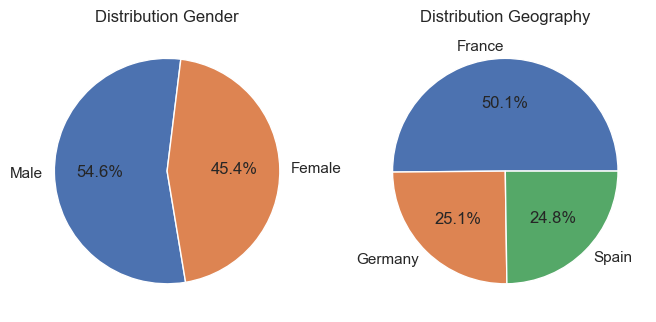

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

labels = list(df.Gender.value_counts().index)
size = df.Gender.value_counts()
ax[0].pie(size, labels=labels, startangle=83, autopct='%.1f%%', pctdistance=0.6)
ax[0].set_title("Distribution Gender")

labels = df.Geography.value_counts().index
size = df.Geography.value_counts()
ax[1].pie(size, labels=labels, autopct='%.1f%%', pctdistance=0.6)
ax[1].set_title("Distribution Geography")

plt.show()

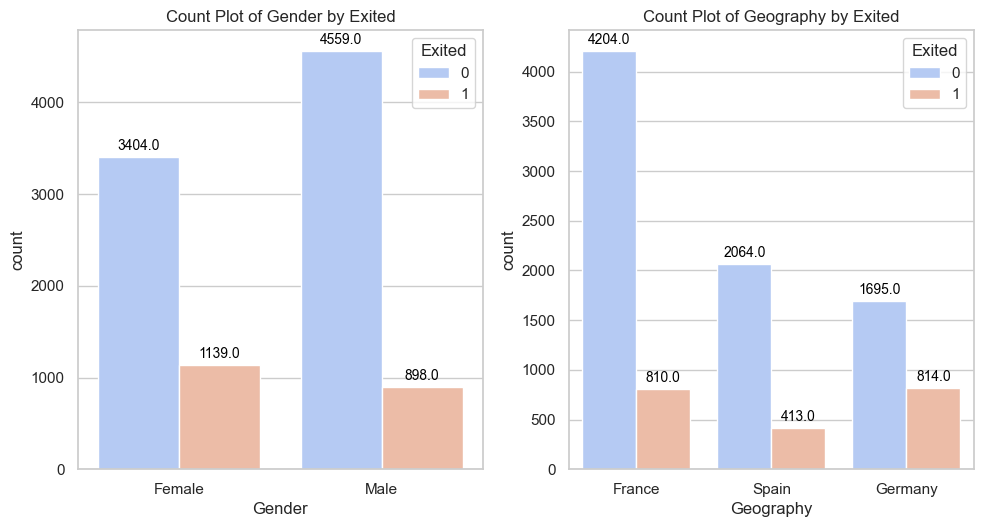

In [79]:
cat_features = ['Gender', 'Geography']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for feature, subplot in zip(cat_features, ax.flatten()):
    plot = sns.countplot(data=df, x=feature, hue='Exited', ax=subplot, palette='coolwarm')
    subplot.set_title(f'Count Plot of {feature} by Exited')

    for p in plot.patches:
        height = p.get_height()
        if height == 0:
            continue
        subplot.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='bottom', 
                         fontsize=10, color='black', 
                         xytext=(0, 3), textcoords='offset points')

for j in range(len(cat_features), 4):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()

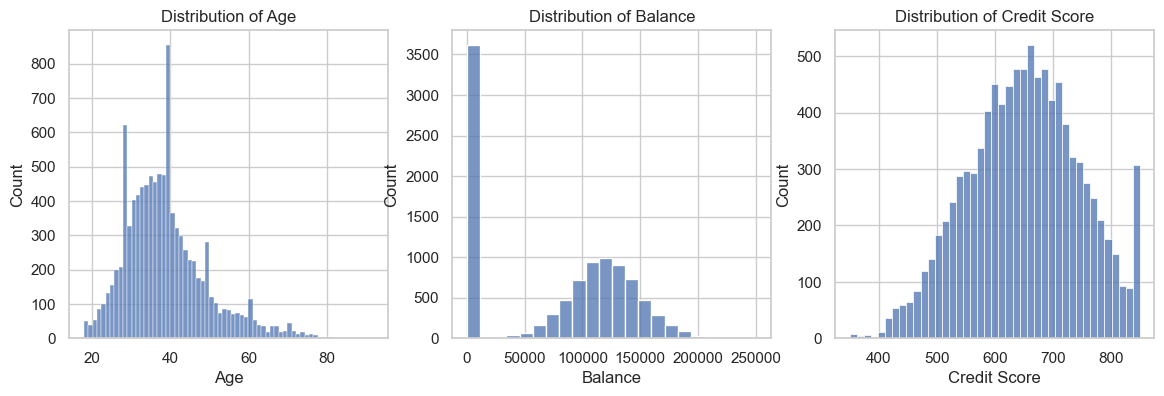

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Graph by (Age)
sns.histplot(df['Age'], ax=ax[0])
ax[0].set_title('Distribution of Age')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Age')

# Graph by (Balance)
sns.histplot(df['Balance'], ax=ax[1])
ax[1].set_title('Distribution of Balance')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Balance')

# Graph by (CreditScore)
sns.histplot(df['CreditScore'], ax=ax[2])
ax[2].set_title('Distribution of Credit Score')
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Credit Score')

plt.show()

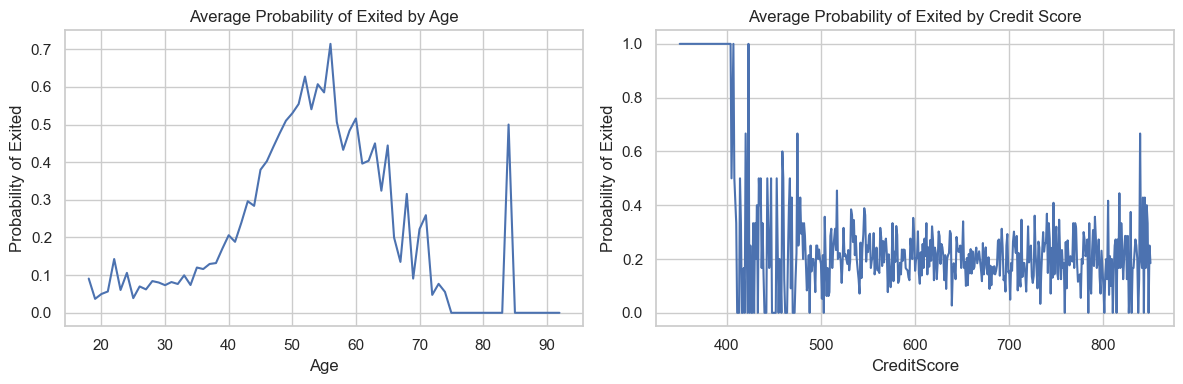

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Graph by (Age)
age_outcome = df.groupby('Age')['Exited'].mean().reset_index()
sns.lineplot(data=age_outcome, x='Age', y='Exited', ax=ax[0])
ax[0].set_title('Average Probability of Exited by Age')
ax[0].set_ylabel('Probability of Exited')
ax[0].set_xlabel('Age')

# Graph by (CreditScore)
CreditScore_outcome = df.groupby('CreditScore')['Exited'].mean().reset_index()
sns.lineplot(data=CreditScore_outcome, x='CreditScore', y='Exited', ax=ax[1])
ax[1].set_title('Average Probability of Exited by Credit Score')
ax[1].set_ylabel('Probability of Exited')
ax[1].set_xlabel('CreditScore')

plt.tight_layout()
plt.show()

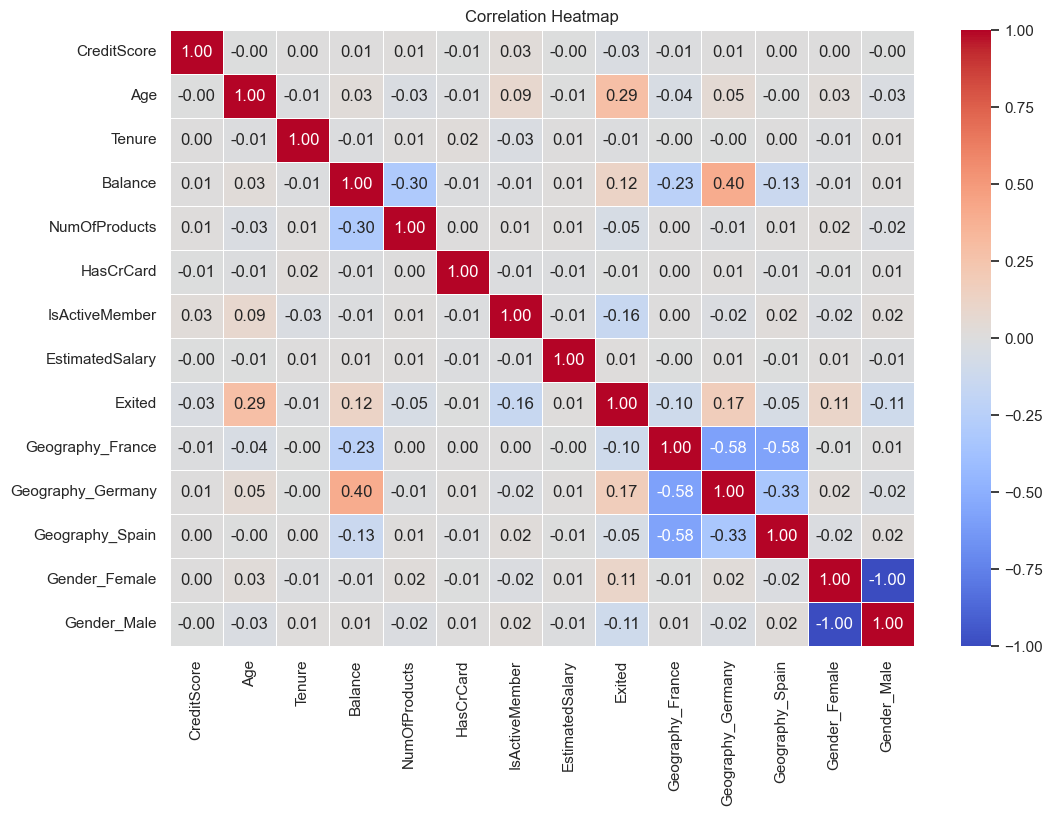

In [82]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=False)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 6. Data Preprocessing

In [83]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [84]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [86]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 7. Machine Learning Model

In [87]:
GB_Model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, random_state=42)

In [88]:
GB_Model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [89]:
y_pred = GB_Model.predict(X_test)

## 8. Model Evaluation


Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC-AUC Score: 0.8688441908780892


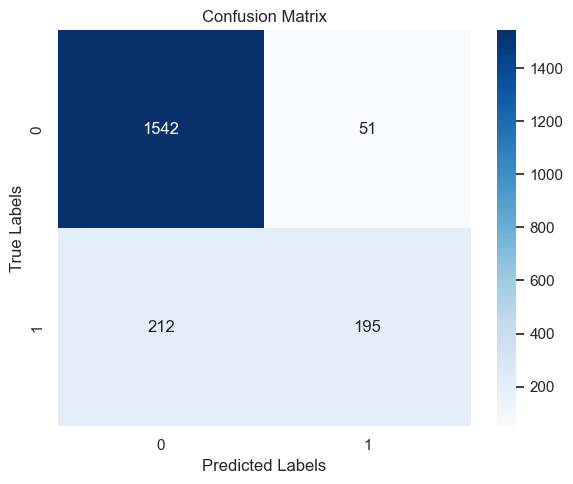

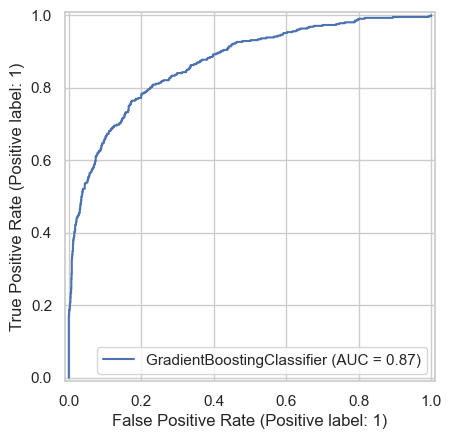

In [90]:
print("\nGradient Boosting Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, GB_Model.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()

RocCurveDisplay.from_estimator(GB_Model, X_test, y_test)
plt.show()

## 9. Feature Importance Analysis

In [91]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': GB_Model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

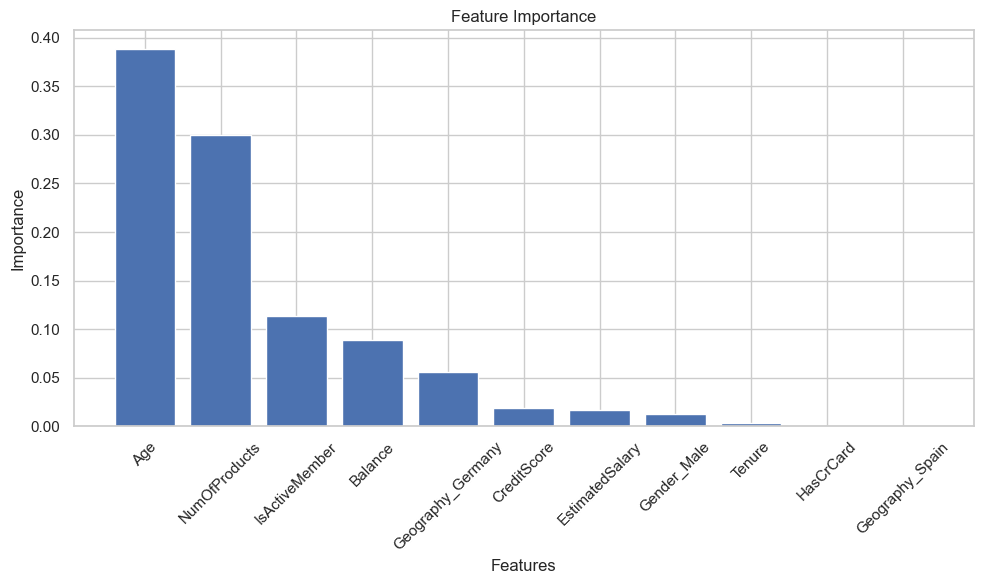

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()